# Problem Analysis Workshop 4

**Team Members:**
1. Erica Holden, 5490685
2. Yu-Chen Chou (Tracy), 9006160
3. Reham Omar Hussein Abuarqoub, 9062922

## Initial Package Import and Data Loading

Here we import the required packages and load the data, which is a collection of information about space missions since 1957. We are dropping an unneeded column called "Unnamed: 0".

In [32]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Space_Corrected.csv')
df = df.drop(columns=['Unnamed: 0.1'], errors='ignore')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

## Convert Factor Variables to Numeric

Here we are converting Status Rocket from factor variables to numeric, with 1 for Active, 0 for Inactive, and 2 for Pending.

In [33]:
status_map = {
    'StatusActive': 1,
    'StatusInactive': 0,
    'StatusPending': 2
}
df['Status Rocket Numeric'] = df['Status Rocket'].map(status_map)
print(df.head())

  Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  Status Rocket Numeric  
0  StatusActive   50.0         Success        

## Convert Calendar Date to Julian Date

Here we are converting Datum from string dates in timezones to Julian Dates.

In [34]:
df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
df['Datum'] = df['Datum'].dt.tz_localize(None)  # Remove any tz if still lurking

df['Julian'] = df['Datum'].apply(lambda x: x.to_julian_date() if pd.notnull(x) else None)
print(df.head())

  Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                Datum                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  Status Rocket Numeric        Julian  
0  StatusActive   50.0         Success                    1.0  2.459069e+06  
1 

## Converting Categorical Values to Dummies

Here we are converting Status Mission to create a new column with dummies, with 1 for Success and 0 for Failure.

In [35]:
df['Status Mission Numeric'] = df['Status Mission'].map({'Success': 1, 'Failure': 0})
print(df.head())

  Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                Datum                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  Status Rocket Numeric        Julian  \
0  StatusActive   50.0         Success                    1.0  2.459069e+06   


## Applying Box-Cox Transformation

Here we will apply a Box-Cox transformation to the Rocket column.

In [36]:
df[' Rocket'] = pd.to_numeric(df[' Rocket'], errors='coerce')
df[' Rocket'] = df[' Rocket'].astype(float).fillna(0)

transformed_rocket, lambda_value = stats.boxcox(df[' Rocket'] + 1)
df['Rocket Transformed'] = transformed_rocket
print(df.head())

  Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                Datum                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Status Rocket   Rocket Status Mission  Status Rocket Numeric        Julian  \
0  StatusActive    50.00        Success                    1.0  2.459069e+06  

## Tukey's Ladder

Here we apply Tukey's Ladder to get a different look at transforming the data to adjust for skewing, and draw plots to demonstrate.

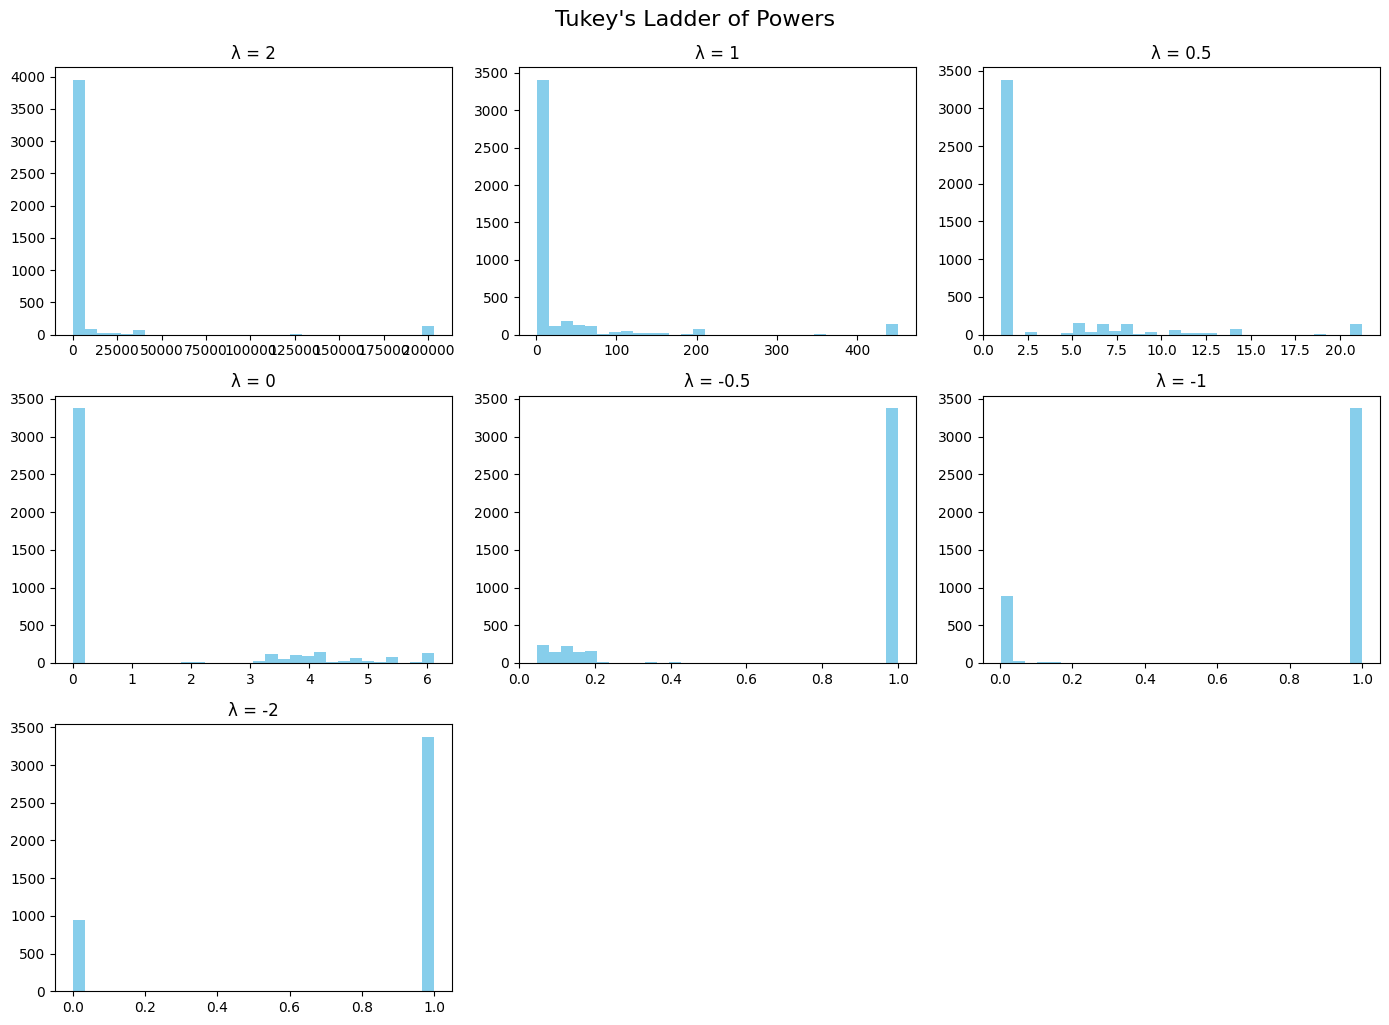

In [37]:
# Define transformations in Tukey's Ladder
def tukey_transform(y, power):
    y = y + abs(y.min()) + 1 # Shift to avoid negative values
    if power == 0:
        return np.log(y)
    else:
        return np.power(y, power)

powers = [2, 1, 0.5, 0, -0.5, -1, -2]
plt.figure(figsize=(14, 10))

for i, p in enumerate(powers):
    transformed = tukey_transform(df[' Rocket'], p)
    plt.subplot(3, 3, i+1)
    plt.hist(transformed, bins=30, color='skyblue')
    plt.title(f"λ = {p}")

plt.tight_layout()
plt.suptitle("Tukey's Ladder of Powers", fontsize=16, y=1.02)
plt.show()

### Conclusion of Tukey's Ladder

* λ = 2 (square): Data is extremely right-skewed with a huge spike near zero and some huge outliers.
* λ = 1 (no change): Still very skewed with long right tail.
* λ = 0.5 (square root): Skewness reduced but still a right tail.
* λ = 0 (log): Data looks less skewed; the tail is much shorter, and the main mass is more compact.
*  λ = -0.5, -1, -2 (reciprocals): Data is compressed heavily near 1 with a big spike, losing detail and not ideal.

Best choice according to plots:
λ = 0 (log transformation)
* It clearly reduces skewness the most.
* Avoids extreme compression.
* Produces a distribution closer to symmetric.

## Transformation Summary

1. We converted Status Rocket factor variables to numeric
2. We converted Datum calendar dates as strings to Julian
3. We converted Status Mission categorical values to dummies
4. We performed a Box-Cox transformation on the Rocket column
5. We applied Tukey's Ladder to the Rocket column to determine the best transformation.